In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('boston.csv')
data = data.iloc[: , 1:]
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
class LinearRegression:
    def __init__(self, alpha, times): # alpha - learning rate, control step size; times - number of iteration
        self.alpha = alpha
        self.times = times
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        # create slope vector, initialize as 0
        self.w_ = np.zeros(1+X.shape[1]) # num of col
        # create loss, sum(predict - true)**2/2
        self.loss_ = []
        # change slope for each iteration to minimize loss
        for i in range(self.times):
            prediction = np.dot(X, self.w_[1:])+self.w_[0]
            error = y-prediction
            self.loss_.append(np.sum(error**2)/2)
            # change w, wi = wi + alpha * sum((error) * Xi)
            self.w_[0] += self.alpha*sum(error)
            self.w_[1:] += self.alpha*np.dot(X.T, error)
    def predict(self, X):
        X = np.asarray(X)
        result = np.dot(X, self.w_[1:])+self.w_[0]
        return result

In [21]:
lr = LinearRegression(0.005,20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean(result-test_y)**2)
display(lr.w_)
display(lr.loss_) # loss increase!!! difference between data scale is not

2.3934253142994497e+234

array([-4.91983295e+111, -2.24266008e+112, -4.88602630e+112,
       -5.87176682e+112, -3.32127982e+110, -2.77955977e+111,
       -3.06712887e+112, -3.47971590e+113, -1.79076291e+112,
       -5.41290922e+112, -2.15392269e+114, -9.17751422e+112,
       -1.75008714e+114, -6.49730426e+112])

[116831.44,
 3.5215413268418908e+16,
 1.3578663249157692e+28,
 5.238962180671644e+39,
 2.0213194925954368e+51,
 7.798744151422267e+62,
 3.008945917176015e+74,
 1.160924804905178e+86,
 4.479131362749882e+97,
 1.7281582476315757e+109,
 6.667656487358548e+120,
 2.5725446783790385e+132,
 9.92550551277438e+143,
 3.829502379962134e+155,
 1.477515523945991e+167,
 5.7006156594240886e+178,
 2.199436714524769e+190,
 8.485963885676564e+201,
 3.2740920706402954e+213,
 1.2632246650405117e+225]

In [22]:
class StandardScaler:
    def fit(self, X):
        X = np.asarray(X)
        self.sd_ = np.std(X, axis = 0)
        self.mean_ = np.mean(X, axis = 0)
    def transform(self, X):
        return (X-self.mean_)/self.sd_
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [28]:
lr = LinearRegression(0.0005,20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

# standardize training set
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)
sc2 = StandardScaler()
train_y = sc2.fit_transform(train_y)
test_y = sc2.transform(test_y)

lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean(result-test_y)**2)
display(lr.w_)
display(lr.loss_)

2.7434909668212713e-05

array([ 1.66261969e-16, -7.82096101e-02,  3.27417218e-02, -4.18423834e-02,
        7.23915815e-02, -1.22422484e-01,  3.18709730e-01, -9.44094559e-03,
       -2.09320117e-01,  1.04023908e-01, -5.20477318e-02, -1.82216410e-01,
        9.76133507e-02, -3.94395606e-01])

[200.0,
 107.18106695239439,
 88.90466866295792,
 79.78035025519529,
 74.3187880885867,
 70.90417512718281,
 68.69155318506807,
 67.20013197881177,
 66.15079837015878,
 65.37902020765743,
 64.78625525603303,
 64.31246996531247,
 63.9204121068791,
 63.586500210988966,
 63.295479267264845,
 63.03724485771134,
 62.80493063951664,
 62.59374088047521,
 62.40022787877571,
 62.22183840063286]

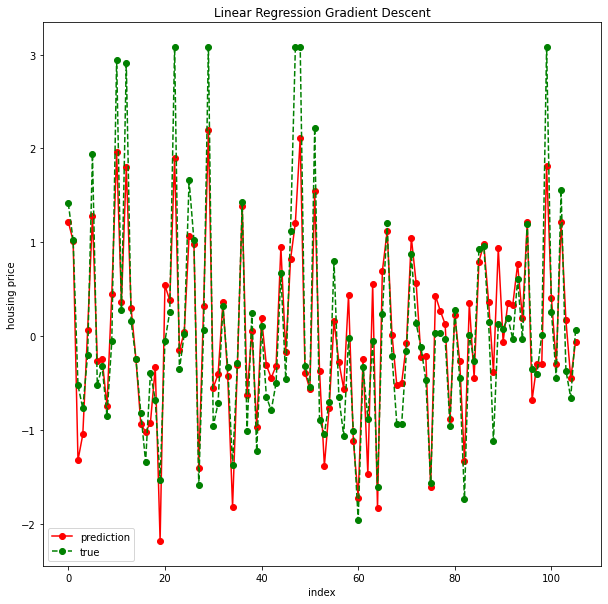

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(result, 'ro-', label='prediction')
plt.plot(test_y.values, 'go--', label='true')
plt.title('Linear Regression Gradient Descent')
plt.xlabel('index')
plt.ylabel('housing price')
plt.legend()
plt.show()

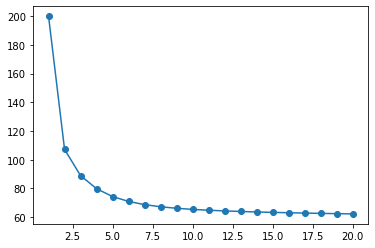

In [26]:
plt.plot(range(1, lr.times+1), lr.loss_, 'o-')

In [30]:
# RM
lr = LinearRegression(0.0005, 50)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, 5:6] # slice return dataframe instead of serie
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, 5:6]
test_y = t.iloc[400:, -1]

# standardize training set
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)
sc2 = StandardScaler()
train_y = sc2.fit_transform(train_y)
test_y = sc2.transform(test_y)

lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean(result-test_y)**2)
display(lr.w_)
display(lr.loss_)

0.00046463152419983715

array([-2.74742902e-16,  6.54984608e-01])

[200.0,
 169.1107700113348,
 149.34166281858916,
 136.68943421523193,
 128.5920079090833,
 123.40965507314814,
 120.09294925814967,
 117.97025753655065,
 116.61173483472726,
 115.7422803055603,
 115.18582940689345,
 114.82970083174666,
 114.60177854365273,
 114.45590827927259,
 114.3625513100693,
 114.30280284977921,
 114.26456383519356,
 114.24009086585872,
 114.22442816548445,
 114.21440403724489,
 114.2079885951716,
 114.20388271224466,
 114.20125494717145,
 114.19957317752458,
 114.19849684495058,
 114.19780799210322,
 114.19736712628092,
 114.19708497215464,
 114.19690439351382,
 114.1967888231837,
 114.19671485817241,
 114.1966675205652,
 114.19663722449658,
 114.19661783501266,
 114.19660542574297,
 114.19659748381034,
 114.19659240097349,
 114.19658914795788,
 114.19658706602789,
 114.19658573359271,
 114.19658488083418,
 114.19658433506874,
 114.19658398577884,
 114.19658376223332,
 114.19658361916419,
 114.19658352759993,
 114.1965834689988,
 114.1965834314941,
 114.196583407

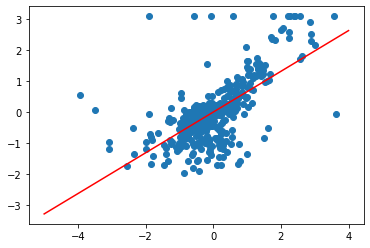

In [38]:
plt.scatter(train_X['RM'], train_y)
x = np.arange(-5,5)
# y = lr.w_[0] + lr.w_[1]*x
# plt.plot(x, y, 'r')
plt.plot(x, lr.predict(x.reshape(-1,1)), 'r')